In [1]:
import pandas as pd
import numpy as np

In [2]:
m_tetrid = np.genfromtxt("tetrid_fg.csv", delimiter=",")
m1_tetrid = np.genfromtxt("tetrid_fg1.csv", delimiter=",")
m_tetry17 = np.genfromtxt("tetry-17_fg.csv", delimiter=",")
m_tetry20 = np.genfromtxt("tetry-20_fg.csv", delimiter=",")

m_tetrid_names = ['O', 'cyanide', 'methylamine', 'F', 'C', 'Cl', 'trifluoromethyl', 'Br']
m_tetry20_names = ['Br', 'methylamine', 'O', 'F', 'Cl', 'trifluoromethyl', 'C', 'cyanide']
m_tetry17_names = ['methylamine', 'Cl', 'O', 'cyanide', 'F', 'C', 'trifluoromethyl', 'Br']

In [3]:
def gen_vh(m_array, names):
    u, s, vh = np.linalg.svd(m_tetrid)
    vh_s = vh[:3, :]
    xvhs = np.dot(m_tetrid, vh_s.T)
    vh_s1 = vh_s[0,:]
    vh_s2 = vh_s[1,:]
    vh_s3 = vh_s[2,:]
    vh_s1_func = pd.DataFrame([vh_s1[:8], vh_s1[8:16], vh_s1[16:24], vh_s1[24:]], index=["O2H", "O", "OH", "bare"], columns=names)
    vh_s2_func = pd.DataFrame([vh_s2[:8], vh_s2[8:16], vh_s2[16:24], vh_s2[24:]], index=["O2H", "O", "OH", "bare"], columns=names)
    return vh_s1_func, vh_s2_func

In [6]:
vh_s1_tetrid, vh_s2_tetrid = gen_vh(m_tetrid, m_tetrid_names)
vh_s1_tetry20, vh_s2_tetry20 = gen_vh(m_tetry20, m_tetry20_names)
vh_s1_tetry17, vh_s2_tetry17 = gen_vh(m_tetry17, m_tetry17_names)

In [5]:
vh_s1_tetrid

,O,cyanide,methylamine,F,C,Cl,trifluoromethyl,Br
O2H,0.002331,-0.424771,-0.034461,-0.026616,-0.050736,-0.160151,-0.308662,-0.174168
O,0.037659,-0.021782,0.054916,0.006686,0.029763,0.022819,0.057629,0.026726
OH,-0.048851,-0.103618,-0.069290,-0.128957,0.007105,-0.121188,-0.088570,-0.120914
bare,0.008861,0.550170,0.048835,0.148887,0.013868,0.258521,0.339603,0.268356


In [12]:
vh_names = ["tetry17_s1", "tetry17_s2", "tetry20_s1", "tetry20_s1", "tetrid_s1", "tetrid_s2"]

vh_func_contributions = {}
for i, vh in enumerate([vh_s1_tetry17, vh_s2_tetry17, vh_s1_tetry20, vh_s2_tetry20, vh_s1_tetrid, vh_s2_tetrid]):
    vh_func_contributions[vh_names[i]] = (vh.abs().sum())/vh.abs().sum().sum()
    
df_vh = pd.DataFrame(vh_func_contributions)
df_vh

,tetry17_s1,tetry17_s2,tetry20_s1,tetrid_s1,tetrid_s2
Br,0.156730,0.075235,0.152585,0.156730,0.075235
C,0.149431,0.075065,0.135720,0.026948,0.104302
Cl,0.292219,0.183373,0.104302,0.149431,0.075065
F,0.026948,0.104302,0.053321,0.082631,0.053321
O,0.055106,0.220399,0.220399,0.025947,0.152585
cyanide,0.082631,0.053321,0.075235,0.292219,0.183373
methylamine,0.025947,0.152585,0.183373,0.055106,0.220399
trifluoromethyl,0.210987,0.135720,0.075065,0.210987,0.135720


In [89]:
vha = np.abs(vh_s)
vh_func = pd.DataFrame(vha[:,:8] + vha[:,8:16] + vha[:,16:24] + vha[:,24:], columns=['O', 'cyanide', 'methylamine', 'F', 'C', 'Cl', 'trifluoromethyl', 'Br'])
vha_func

,O,cyanide,methylamine,F,C,Cl,trifluoromethyl,Br
0,0.097703,1.100340,0.207502,0.311146,0.101473,0.562679,0.794464,0.590164
1,0.660756,0.794080,0.954415,0.230902,0.451669,0.325059,0.587722,0.325796
2,0.363722,0.826431,0.856897,0.535356,0.190004,0.581370,0.677537,0.583678


In [93]:
vh_s1_func.to_csv("vh_s1_func.csv")
vh_s2_func.to_csv("vh_s2_func.csv")
vha_func.to_csv("vha_func.csv")

In [48]:
pd.DataFrame(vh_s[:,:8], columns=['O', 'cyanide', 'methylamine', 'F', 'C', 'Cl', 'trifluoromethyl', 'Br'])

,O,cyanide,methylamine,F,C,Cl,trifluoromethyl,Br
0,0.002331,-0.424771,-0.034461,-0.026616,-0.050736,-0.160151,-0.308662,-0.174168
1,0.045765,-0.061359,-0.094978,0.034495,0.155517,0.162530,0.162199,0.162898
2,0.120178,-0.413215,-0.179924,0.140703,0.039079,0.045606,-0.206635,0.043801


In [49]:
pd.DataFrame(vh_s[:,24:], columns=['O', 'cyanide', 'methylamine', 'F', 'C', 'Cl', 'trifluoromethyl', 'Br'])

,O,cyanide,methylamine,F,C,Cl,trifluoromethyl,Br
0,0.008861,0.550170,0.048835,0.148887,0.013868,0.258521,0.339603,0.268356
1,-0.019057,0.111416,0.477207,0.070403,-0.087246,-0.003812,0.007853,-0.002672
2,-0.102866,0.209853,-0.046798,-0.267678,-0.077634,-0.290685,-0.132134,-0.291839


In [33]:
u1, s1, vh1 = np.linalg.svd(m1_tetrid)
vh1_s = vh1[:6, :]
xvhs1 = np.dot(m1_tetrid, vh1_s.T)

print(s1)
print()
print(xvhs1)
print()
print(np.linalg.norm(xvhs1))

[0.53925473 0.1895579  0.094676   0.06224203 0.02462188 0.00415687]

[[-5.16324010e-02  1.39843424e-02 -6.54121101e-03  1.30852279e-02
   2.38259320e-02  2.18764228e-05]
 [-2.49884725e-02  9.92606183e-03 -3.59405960e-04 -1.42600577e-03
   3.82360005e-05 -4.14556772e-03]
 [ 3.11827227e-02  1.33246057e-01 -5.79303758e-02  1.98217249e-02
  -3.96167835e-03  1.20484621e-04]
 [-4.35259615e-01 -5.63379741e-02 -4.56096594e-02 -9.63892502e-03
  -1.43066442e-03  1.13066576e-04]
 [-9.34625877e-02 -5.20049730e-02  1.77594147e-02  5.65769340e-02
  -4.43606225e-03 -1.17343210e-04]
 [-2.97231866e-01  1.09567851e-01  5.62944167e-02 -3.74887308e-03
  -1.06773596e-03  2.28686101e-04]]

0.5832572249209225


In [32]:
u1

array([[-0.0957477 ,  0.07377346, -0.06909049,  0.21023139,  0.9676732 ,
         0.00526271],
       [-0.0463389 ,  0.05236427, -0.00379617, -0.02291066,  0.00155293,
        -0.99728079],
       [ 0.05782559,  0.70293063, -0.61188029,  0.31846208, -0.16090074,
         0.02898445],
       [-0.8071503 , -0.2972072 , -0.4817447 , -0.15486201, -0.05810541,
         0.02719992],
       [-0.17331807, -0.27434874,  0.18758096,  0.90898284, -0.1801675 ,
        -0.02822873],
       [-0.5511901 ,  0.57801785,  0.59460073, -0.06023058, -0.04336533,
         0.055014  ]])

In [25]:
vh1_s.shape

(3, 8)

In [26]:
func_list = ['cyanide', 'trifluoromethyl', 'C', 'Cl', 'F', 'O', 'methylamine', 'Br']

In [30]:
pd.DataFrame(m1_tetrid, columns=func_list)

,cyanide,trifluoromethyl,C,Cl,F,O,methylamine,Br
0,0.055125,0.014075,0.003296,0.003139,0.007006,0.015005,0.008071,0.006797
1,0.023645,0.010071,0.001570,0.002664,-0.001547,-0.006211,0.004022,0.003885
2,0.043139,-0.041968,-0.064604,-0.066246,-0.025482,-0.029597,0.064146,-0.068315
3,0.280013,0.260534,0.071092,0.132847,0.026480,0.024160,0.070971,0.139609
4,0.050298,0.043305,-0.007108,0.057506,0.054762,0.023796,-0.008604,0.059783
5,0.278133,0.129334,-0.015417,0.044638,-0.027707,-0.055514,-0.018804,0.054931


In [31]:
pd.DataFrame(vh1_s, columns=func_list)

,cyanide,trifluoromethyl,C,Cl,F,O,methylamine,Br
0,-0.726770,-0.543944,-0.096014,-0.270842,-0.032759,0.007628,-0.079143,-0.293192
1,0.524238,-0.224156,-0.386043,-0.399104,-0.297456,-0.347231,0.085960,-0.387526
2,0.101649,-0.167060,-0.057590,0.144053,-0.040617,-0.243857,-0.916888,0.189449


In [64]:
f_tetrid = pd.DataFrame(np.vstack([m_tetrid[:,:8], m_tetrid[:,8:16], m_tetrid[:,16:24], m_tetrid[:,24:]]), columns=m_tetrid_names)
f_tetrid

,O,cyanide,methylamine,F,C,Cl,trifluoromethyl,Br
0,0.015005,0.055125,0.008071,0.007006,0.003296,0.003139,0.014075,0.006797
1,-0.006211,0.023645,0.004022,-0.001547,0.001570,0.002664,0.010071,0.003885
2,-0.029597,0.043139,0.064146,-0.025482,-0.064604,-0.066246,-0.041968,-0.068315
3,0.024160,0.280013,0.070971,0.026480,0.071092,0.132847,0.260534,0.139609
4,0.023796,0.050298,-0.008604,0.054762,-0.007108,0.057506,0.043305,0.059783
5,-0.055514,0.278133,-0.018804,-0.027707,-0.015417,0.044638,0.129334,0.054931
6,-0.087962,0.092411,-0.019605,-0.010797,-0.015388,0.029884,0.073816,0.036270
7,0.017606,0.059885,-0.009609,0.040460,-0.005051,0.045090,0.045085,0.045345
8,-0.098242,0.087462,0.115371,-0.013669,-0.032999,0.021434,0.058938,0.026280
9,-0.036840,-0.013652,-0.046608,-0.021219,-0.037347,-0.055818,-0.109892,-0.062486


In [73]:
import seaborn as sns
f_tetrid_arr = np.array(f_tetrid)
ff_cov = np.dot(f_tetrid.T, f_tetrid)
ff_cov

array([[ 0.05520049, -0.0376191 ,  0.00220243,  0.02893111,  0.01973316,
         0.01199396, -0.01078756,  0.00973227],
       [-0.0376191 ,  0.46164766,  0.05660455,  0.06849516,  0.00398563,
         0.17836624,  0.29302099,  0.18992296],
       [ 0.00220243,  0.05660455,  0.09804093,  0.02172183, -0.00354347,
         0.03325368,  0.04497479,  0.03347069],
       [ 0.02893111,  0.06849516,  0.02172183,  0.06399566,  0.00909255,
         0.06262043,  0.05935107,  0.06336407],
       [ 0.01973316,  0.00398563, -0.00354347,  0.00909255,  0.01858871,
         0.01813941,  0.02071292,  0.01820327],
       [ 0.01199396,  0.17836624,  0.03325368,  0.06262043,  0.01813941,
         0.11075507,  0.14312717,  0.11491212],
       [-0.01078756,  0.29302099,  0.04497479,  0.05935107,  0.02071292,
         0.14312717,  0.22066887,  0.1511009 ],
       [ 0.00973227,  0.18992296,  0.03347069,  0.06336407,  0.01820327,
         0.11491212,  0.1511009 ,  0.11953862]])

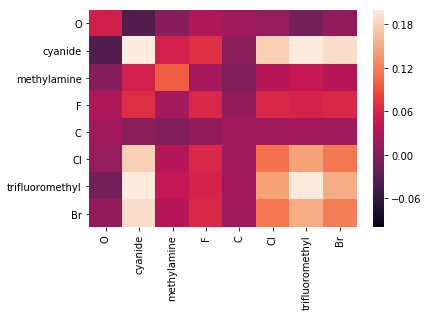

In [76]:
import matplotlib.pyplot as plt
sns.heatmap(pd.DataFrame(ff_cov, columns=m_tetrid_names, index=m_tetrid_names), vmin=-0.1, vmax=0.2)
plt.show()

In [78]:
np.diag(ff_cov)

array([0.05520049, 0.46164766, 0.09804093, 0.06399566, 0.01858871,
       0.11075507, 0.22066887, 0.11953862])